## Plotting with categorical data

### Categorical scatterplots

앞서 `seaborn.scatterplot()` 과 `seaborn.lineplot()` 의 사용법, 그리고 이를 감싸는 `seaborn.relplot()` 함수와의 차이를 살펴보았습니다. 변수가 명목형일 경우에는 `seaborn.relplot()` 대신 `seaborn.catplot()` 을 이용할 수 있습니다. `catplot()` 도 `stripplot()`, `boxplot()`, `barplot()` 등 다양한 함수들을 호출하는 상위 함수 입니다.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")

### Strip plot

앞서 `order`, `kind`, 등의 argument 사용법에 대하여 살펴보았으니, 여기에서는 어떤 그림들을 그릴 수 있는지에 대해서만 간단히 살펴봅니다.

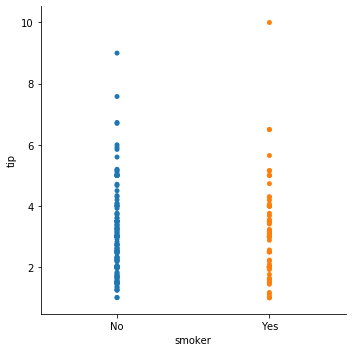

In [2]:
g = sns.catplot(x="smoker", y="tip", kind='strip', order=["No", "Yes"], jitter=False, data=tips)

`seaborn.catplot()` 의 `kind` 에 입력되는 값은 함수 이름입니다. 이 역시 `seaborn.stripplot()` 을 이용할 수도 있습니다.  `jitter` 는 데이터 포인트가 겹쳐 그리는 것을 방지하기 위하여 작은 permutation 을 함을 의미합니다.

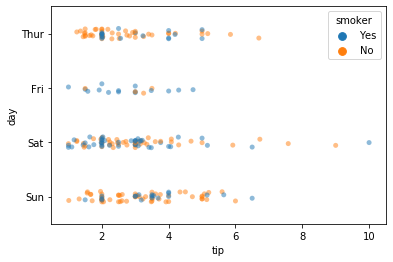

In [3]:
g = sns.stripplot(x="tip", y="day", hue='smoker', alpha=0.5, data=tips)

### Boxplots

Box plot 도 그릴 수 있습니다.

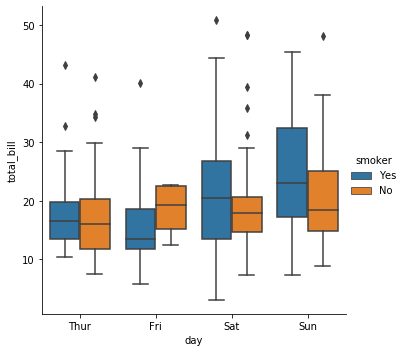

In [4]:
g = sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips)

`seaborn.boxplot()` 이나 이 함수가 이용하는 `matplotlib.pyplot.boxplot()` 이 이용하는 arguments 를 입력할 수도 있습니다. `dodge=False` 로 입력하면 'smoker' 유무 별로 각각 boxplot 이 겹쳐져 그려지는데, 이왕이면 각 box 를 투명하게 만들면 좋을듯 합니다. 그런데 아직 boxplot 의 투명도를 조절하는 argument 를 찾지 못했습니다.

찾다보면 seaborn 으로 여러 설정들을 할 수는 있지만, 이를 위해서는 matplotlib 함수들의 arguments 를 찾아야 하는 일들이 발생합니다. `seaborn.catplot()` 의 그림을 수정하기 위하여 `seaborn.boxplot()` 의 arguments 를 확인하고, 또 디테일한 설정을 하기 위해서 `seaborn.boxplot()` 이 이용하는 `matplotlib.pyplot.boxplot()` 의 arguments 를 확인해야 합니다. 복잡해지네요.

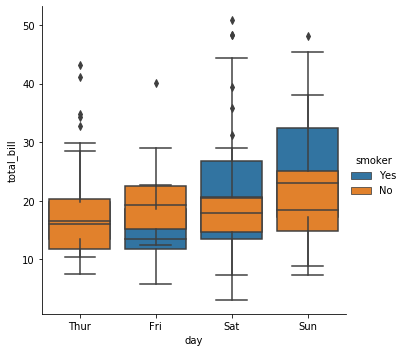

In [5]:
g = sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips, dodge=False)

Boxen plot 은 데이터의 분포를 box 의 width 로 표현하는 plot 입니다. 이를 위하여 'diamonds' dataset 을 이용합니다.

In [6]:
diamonds = sns.load_dataset("diamonds")
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


이 데이터는 color 가 정렬되어 있지 않은 데이터입니다. 이를 정렬하여 'color' 별 'price' 에 대한 boxen plot 을 그려봅니다.

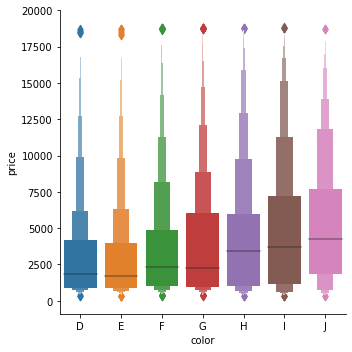

In [7]:
g = sns.catplot(x="color", y="price", kind="boxen", data=diamonds.sort_values("color"))

### Violinplots

Violin plot 은 분포를 밀도 함수로 표현하는 그림입니다. 이 역시 `hue` 를 설정할 수 있습니다.

/home/lovit/anaconda3/envs/pytorch/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


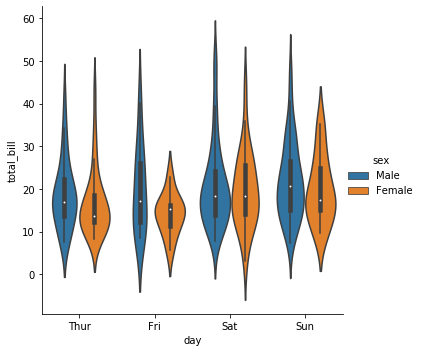

In [8]:
g = sns.catplot(x="day", y="total_bill", kind="violin", hue="sex", data=tips)

그런데 `hue` 가 두 종류라면 굳이 두 개의 분포를 나눠 그릴 필요는 없어보입니다. 이때는 `split=True` 로 설정하면 두 종류의 분포를 서로 붙여서 보여줍니다.

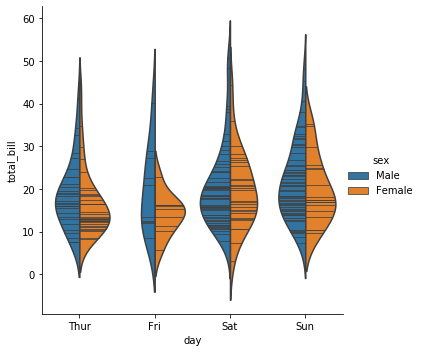

In [9]:
g = sns.catplot(x="day", y="total_bill", hue="sex", kind="violin", split=True, inner="stick", data=tips)

### Bar plots

Bar plot 은 명목형 데이터의 분포를 확인하는데 이용됩니다. 이를 위하여 타이타닉 생존자 데이터를 이용합니다.

In [10]:
titanic = sns.load_dataset("titanic")
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


`seaborn.barplot()` 역시 `seaborn.catplot()` 을 이용하여 그릴 수 있습니다. 성별, 그리고 선실별 생존율을 그려봅니다.

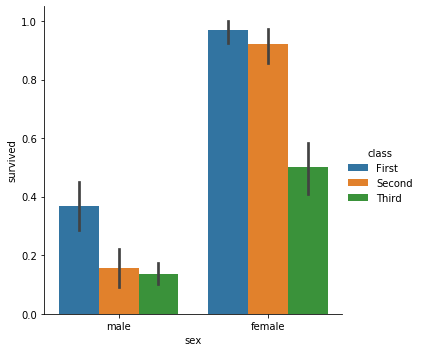

In [11]:
g = sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

`hue` 의 종류가 여러 개이면 `x` 축의 종합적인 분포가 잘 보이지 않습니다. 누적 형식의 bar plot 을 그리기 위해서는 `dodge=False` 로 설정합니다.

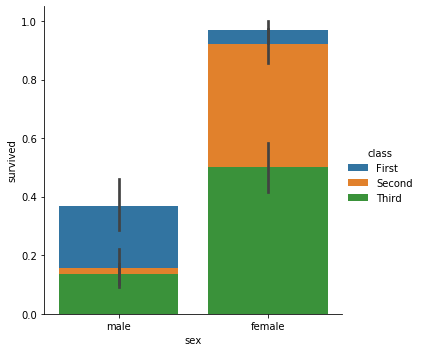

In [12]:
g = sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic, dodge=False)

그런데 누적 형식으로 그림을 그리니 생존율이 명확히 보이지 않습니다. 생존자 수를 bar plot 으로 그려봅니다. 이를 위해서 `seaborn.countplot()` 를 이용합니다. 이번에는 x, y 축을 바꿔보았고, bar 의 모서리에 선을 칠하기 위하여 `edgecolor` 를 조절하였습니다. `edgecolor` 는 그 값이 분명 실수형식인데, 입력할 때에는 str 형식으로 입력해야 합니다. 이는 matplotlib 의 함수를 이용하기 때문인데, 다음 버전에서는 직관적이게 float 를 입력하도록 바꿔줬으면 좋겠네요.

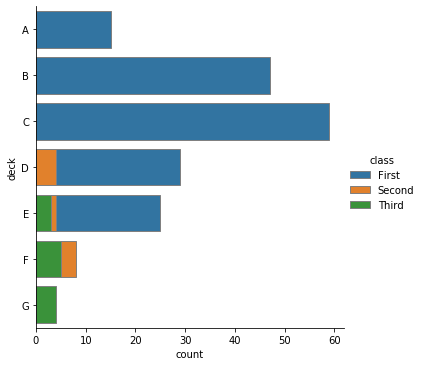

In [13]:
g = sns.catplot(y="deck", hue="class", kind="count", data=titanic, dodge=False, edgecolor=".5")

### Point plots

그 외에도 class 별 생존율을 선으로 연결하는 point plot 을 그릴 수 있고, 이 때 이용하는 `linestyles` 나 `markers` 를 입력할 수도 있습니다. 이 때 `linestyles` 와 `markers` 의 길이는 `hue` 의 종류의 개수와 같아야 합니다.

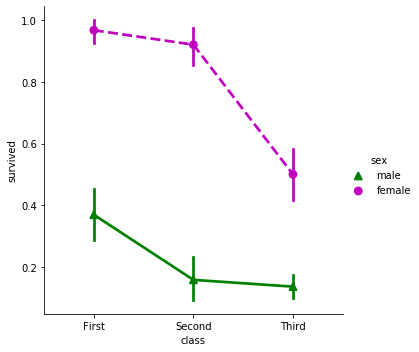

In [14]:
g = sns.catplot(x="class", y="survived", hue="sex",
    palette={"male": "g", "female": "m"},
    markers=["^", "o"], linestyles=["-", "--"],
    kind="point", data=titanic)